# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Ignatyeva Anastasia*</center>

In [3]:
#import itertools
#import math
import random

import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()

import numpy.random as rnd
import pandas as pd
import networkx as nx

%matplotlib inline

## Task 1. Model A

In [256]:
##############
#set parameters of the model, m0 - initial number of edges, n0 -//- of nodes, m - number of edges adding at each iteration
n0 = 100
m0 = 500
m = 10
###network generation
ga = nx.gnm_random_graph(n0,m0)

n = n0

aver_clust = []
aver_path = []
aver_deg = []

aver_clust.append(nx.average_clustering(ga))
path = [len(c) for c in sorted(nx.connected_components(ga), key=len, reverse=True)]
averpath = sum(path)/len(path)
aver_path.append(averpath)

deg = ga.degree().values()
aver_deg.append(sum(deg)/len(deg))

while n < 1234:
    ga.add_node(n)
    c = random.sample(range(n),m)
    ga.add_edges_from([(n,k) for k in c])
    aver_clust.append(nx.average_clustering(ga))
    path = [len(c) for c in sorted(nx.connected_components(ga), key=len, reverse=True)]
    averpath = sum(path)/len(path)
    aver_path.append(averpath)
    deg = ga.degree().values()
    aver_deg.append(sum(deg)/len(deg))
    n += 1
###################

In [166]:
#plt.hist(nx.degree_histogram(ga))

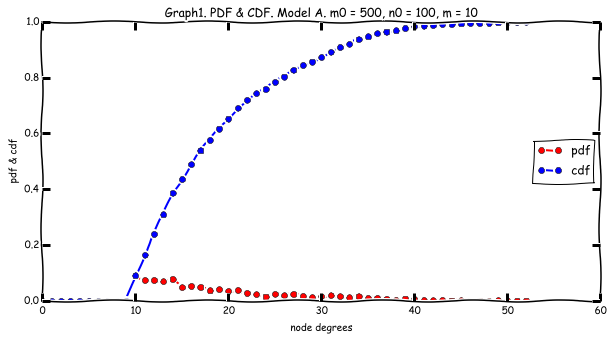

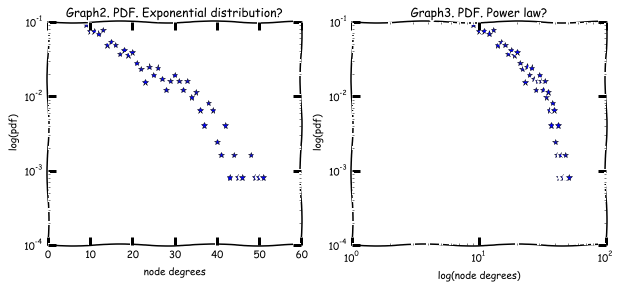

In [189]:
#caclulate pdf and cdf
degree = list(ga.degree().values())

pdf = [sum([degree == k for degree in degree])/ga.number_of_nodes() for k in range(1,max(degree)+1)]
cdf = [sum(pdf[:k]) for k in range(len(pdf)+1)]


#vizualize both cdf and pdf

plt.figure(1, figsize=(10,5))
plt.plot(np.insert(pdf,0,0),'-ro', label = 'pdf')
plt.plot(cdf,'-o', label = 'cdf')
plt.ylabel('pdf & cdf')
plt.xlabel('node degrees')
plt.title('Graph1. PDF & CDF. Model A. m0 = 500, n0 = 100, m = 10')
plt.legend(loc = 7)

plt.figure(2, figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(pdf,'*')
plt.yscale('log')
plt.ylabel('log(pdf)')
plt.xlabel('node degrees')
plt.title('Graph2. PDF. Exponential distribution?')

plt.subplot(1,2,2)
plt.loglog(pdf,'*')
plt.ylabel('log(pdf)')
plt.xlabel('log(node degrees)')
plt.title('Graph3. PDF. Power law?')

<par>In order to understand better what degree distribution we have (at the first glimpse it can be considerate that the distribution is similar to exponential distribution as well as power law) let's analyze pdf in log scales.
<par>According to the graph2 and graph3 it might be concluded that exponential distribution describes the empirical one in a better way, indeed obtaining pdf function decays really fast, which tends to exponential function. 
<par>In this case the distribution should correspond to the following formula:
$$f(k,\lambda) = \lambda e^{-\lambda k}$$

<par>(Perhaps, it is more relevant to analyze dicrete time and as a result to examine geometric distribution $ P(Y = k) = (1 - p)^{k}p$, where k - number of failures before the success(we choose the node with certain degree), p - probability of success.)
<par>Estimate the paramter $\lambda$ ($\frac{1}{\bar{k}}$).
<par> $\lambda \approx 0.052$

In [192]:
#p = len(degree)/(2*ga.number_of_edges())
#print('The probability of success equals to ' + str(p))

lam = 1/((sum(degree)/len(degree)))
print('Lambda equals to ' + str(lam))

Lambda equals to 0.05211148648648649


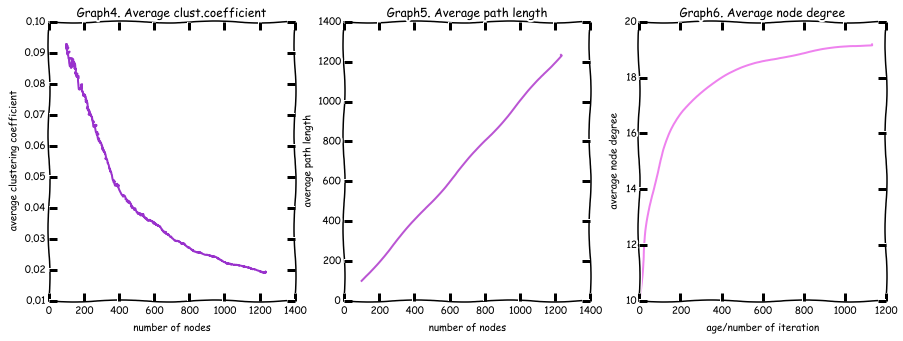

In [257]:
#measure and plot following properties:
#average clustering coefficient to the number of nodes
#average path length to the number of nodes
#average node degee to the nodes "age"

plt.figure(1, figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(range(100,1235),aver_clust,'-', color = '#9932CC')
plt.ylabel('average clustering coefficient')
plt.xlabel('number of nodes')
plt.title('Graph4. Average clust.coefficient')

plt.subplot(1,3,2)
plt.plot(range(100,1235),aver_path,color = '#BA55D3')
plt.ylabel('average path length')
plt.xlabel('number of nodes')
plt.title('Graph5. Average path length')

plt.subplot(1,3,3)
plt.plot(aver_deg, color = '#EE82EE')
plt.ylabel('average node degree')
plt.xlabel('age/number of iteration')
plt.title('Graph6. Average node degree')


Three graphs above (4 - 6) provide accurate information that the properties of the model change significantly while number of nodes is increasing. Indeed growth alone is not enough to produce scale - free model. 

And it is time to check how sensitive our model is to various parameter settings. In my opinion, single parameter which can induce some significant alterations is $\bf m$ - number of edges which is added at each iteration. Additionally discuss cases when  m = 50, 100.

In [195]:
##################  100  #####################
n0 = 100
m0 = 500
m = 100
##########
ga100 = nx.gnm_random_graph(n0,m0)
n = n0
aver_clust100 = []
aver_path100 = []
aver_deg100 = []

aver_clust100.append(nx.average_clustering(ga100))

path = [len(c) for c in sorted(nx.connected_components(ga100), key=len, reverse=True)]
averpath = sum(path)/len(path)
aver_path100.append(averpath)

deg = ga100.degree().values()
aver_deg100.append(sum(deg)/len(deg))
###########
while n < 1234:
    ga100.add_node(n)
    c = random.sample(range(n),m)
    ga100.add_edges_from([(n,k) for k in c])
    aver_clust100.append(nx.average_clustering(ga100))
    
    path = [len(c) for c in sorted(nx.connected_components(ga100), key=len, reverse=True)]
    averpath = sum(path)/len(path)
    aver_path100.append(averpath)
    
    deg = ga100.degree().values()
    aver_deg100.append(sum(deg)/len(deg))
    n += 1
##################

In [196]:
##################  50  #####################
n0 = 100
m0 = 500
m = 50
##########
ga50 = nx.gnm_random_graph(n0,m0)
n = n0
aver_clust50 = []
aver_path50 = []
aver_deg50 = []

aver_clust50.append(nx.average_clustering(ga50))

path = [len(c) for c in sorted(nx.connected_components(ga50), key=len, reverse=True)]
averpath = sum(path)/len(path)
aver_path50.append(averpath)

deg = ga50.degree().values()
aver_deg50.append(sum(deg)/len(deg))
###########
while n < 1234:
    ga50.add_node(n)
    c = random.sample(range(n),m)
    ga50.add_edges_from([(n,k) for k in c])
    aver_clust50.append(nx.average_clustering(ga50))
    
    path = [len(c) for c in sorted(nx.connected_components(ga50), key=len, reverse=True)]
    averpath = sum(path)/len(path)
    aver_path50.append(averpath)
    
    deg = ga50.degree().values()
    aver_deg50.append(sum(deg)/len(deg))
    n += 1
##################

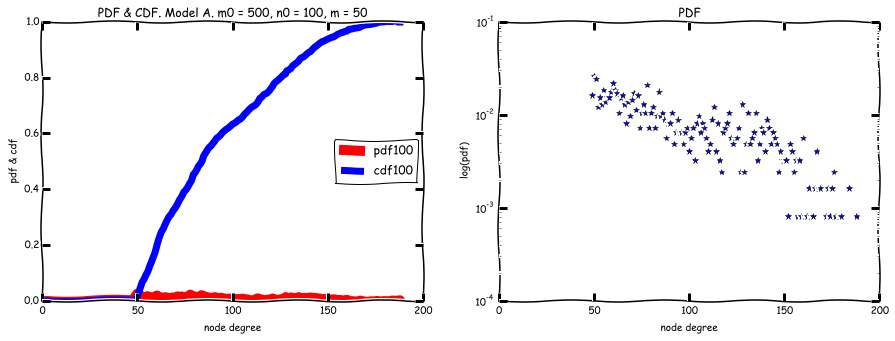

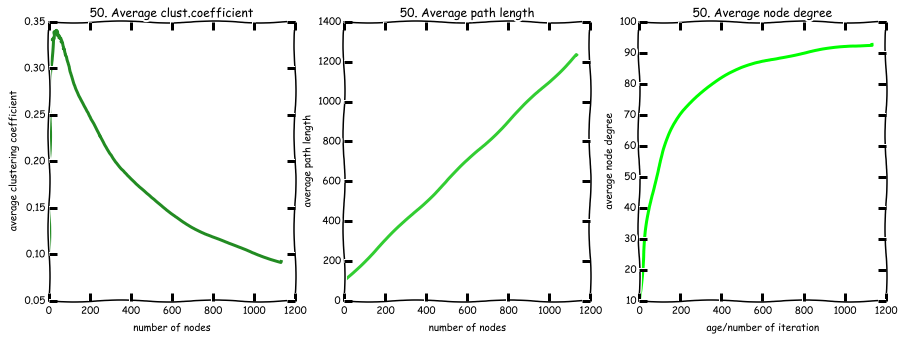

In [255]:
########################## 50 #########################
degree = list(ga50.degree().values())

pdf50 = [sum([degree == k for degree in degree])/ga50.number_of_nodes() for k in range(1,max(degree)+1)]
cdf50 = [sum(pdf50[:k]) for k in range(len(pdf50))]

#vizualize both cdf and pdf and properties

plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(pdf50,'-r', label = 'pdf100',lw = 10)
plt.plot(cdf50,'-', label = 'cdf100',lw = 7)
plt.ylabel('pdf & cdf')
plt.xlabel('node degree')
plt.title('PDF & CDF. Model A. m0 = 500, n0 = 100, m = 50')
plt.legend(loc = 7)

plt.subplot(1,2,2)
plt.plot(pdf50,'*')
plt.yscale('log')
plt.ylabel('log(pdf)')
plt.xlabel('node degree')
plt.title('PDF')

plt.figure(2, figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(aver_clust50,'-', color = '#228B22', lw = 3)
plt.ylabel('average clustering coefficient')
plt.xlabel('number of nodes')
plt.title('50. Average clust.coefficient')

plt.subplot(1,3,2)
plt.plot(aver_path50,color = '#32CD32', lw = 3)
plt.ylabel('average path length')
plt.xlabel('number of nodes')
plt.title('50. Average path length')

plt.subplot(1,3,3)
plt.plot(aver_deg50, color = '#00FF00', lw = 3)
plt.ylabel('average node degree')
plt.xlabel('age/number of iteration')
plt.title('50. Average node degree')


$\lambda \approx 0.0108$

In [251]:
degree = list(ga50.degree().values())
lam = 1/((sum(degree)/len(degree)))
print('Lambda equals to ' + str(lam))

Lambda equals to 0.010786713286713287


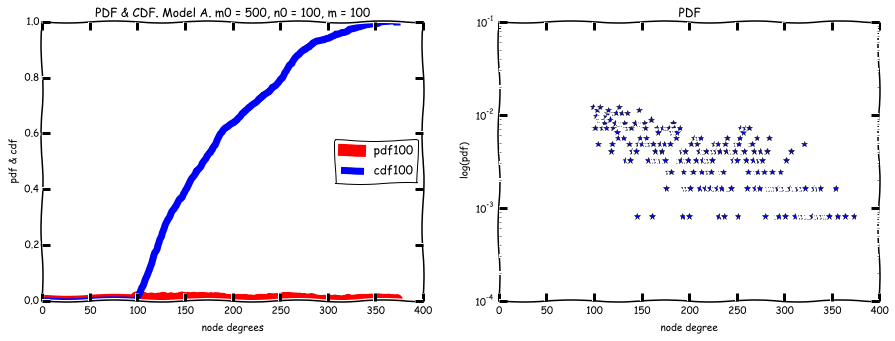

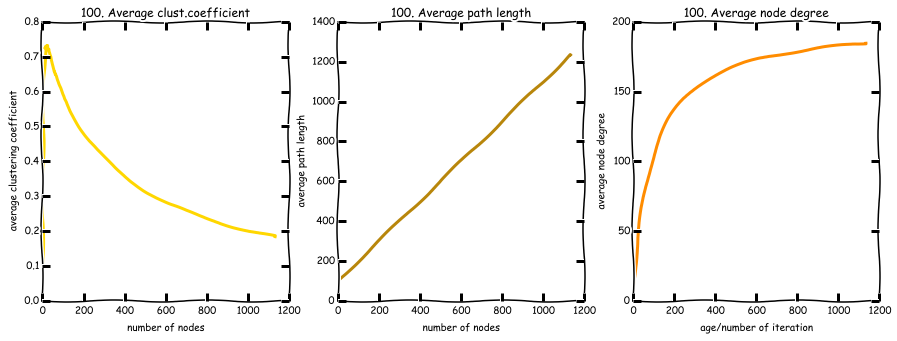

In [254]:
########### 100 ###################
degree = list(ga100.degree().values())
pdf100 = [sum([degree == k for degree in degree])/ga100.number_of_nodes() for k in range(1,max(degree)+1)]
cdf100 = [sum(pdf100[:k]) for k in range(len(pdf100))]
#vizualize both cdf and pdf and properties

plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(pdf100,'-r', label = 'pdf100',lw = 12)
plt.plot(cdf100,'-', label = 'cdf100',lw = 7)
plt.ylabel('pdf & cdf')
plt.xlabel('node degrees')
plt.title('PDF & CDF. Model A. m0 = 500, n0 = 100, m = 100')
plt.legend(loc = 7)

plt.subplot(1,2,2)
plt.plot(pdf100,'*')
plt.yscale('log')
plt.ylabel('log(pdf)')
plt.xlabel('node degree')
plt.title('PDF')

plt.figure(2, figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(aver_clust100,'-', color = '#FFD700', lw = 3)
plt.ylabel('average clustering coefficient')
plt.xlabel('number of nodes')
plt.title('100. Average clust.coefficient')

plt.subplot(1,3,2)
plt.plot(aver_path100,color = '#B8860B', lw = 3)
plt.ylabel('average path length')
plt.xlabel('number of nodes')
plt.title('100. Average path length')

plt.subplot(1,3,3)
plt.plot(aver_deg100, color = '#FF8C00', lw = 3)
plt.ylabel('average node degree')
plt.xlabel('age/number of iteration')
plt.title('100. Average node degree')

$\lambda \approx 0.00541$

In [237]:
degree = list(ga100.degree().values())
lam = 1/((sum(degree)/len(degree)))
print('Lambda equals to ' + str(lam))

Lambda equals to 0.005417032484635645


How it can be observed the common tendencies of model properties behavior preserve with m increasing, while value of $\lambda$ expectedly falls.

## Task 1. Model B 

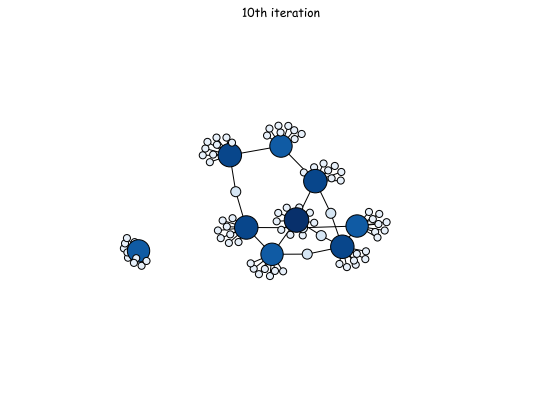

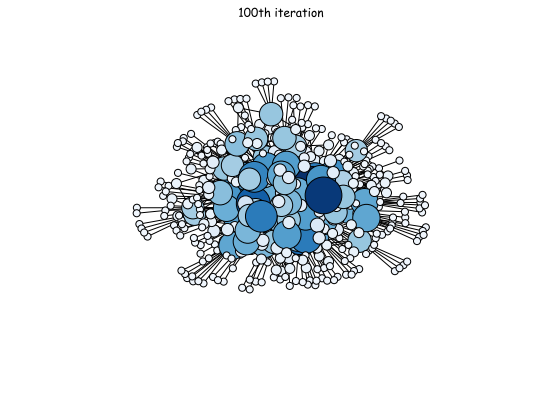

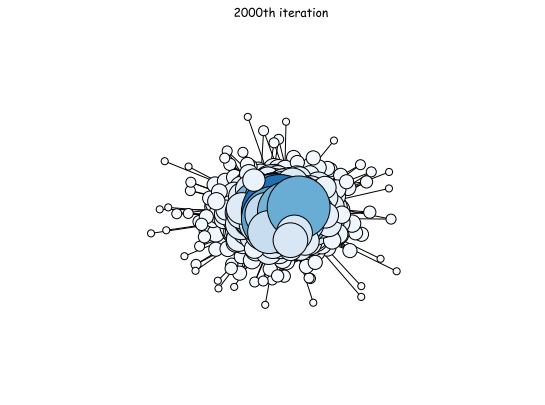

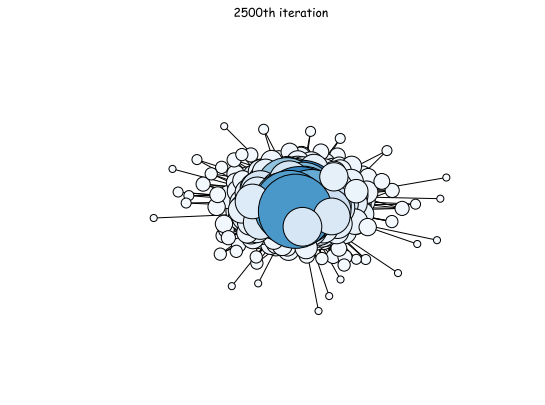

In [258]:
#set parameters
n0 = 1100
m = 10

#graph genetor
gb = nx.empty_graph(n0)

i = 1
j = 1

aver_path = []
aver_clust = []
aver_deg = []

while i < 2500:
    c = random.sample(range(n0),1)
    node = c[0]
    nodelist = gb.nodes()
    index = nodelist.index(node) 
    nodelist.remove(node)
    deg = list(gb.degree().values())
    deg = [x + 1 for x in deg]
    deg.pop(index)
    pa = [([x]*y )for (x,y) in zip(nodelist,deg)]
    pa = sum(pa,[])
    addnode = random.sample(pa, m)
    gb.add_edges_from([(node, k) for k in addnode])
    
    aver_clust.append(nx.average_clustering(gb))
    
    deg = gb.degree().values()
    aver_deg.append(sum(deg)/len(deg))
    
    path = [len(c) for c in sorted(nx.connected_components(gb), key=len, reverse=True)]
    averpath = sum(path)/len(path)
    aver_path.append(averpath)
    i += 1
    
    if i in [10, 100, 2000, 2500]:
        plt.figure(j,figsize = (7,5))
        nx.draw_spring(gb,
          node_size = [d*50 for d in list(nx.degree(gb).values())],
          node_color=list(nx.degree(gb).values()),
          cmap=plt.cm.Blues,
          )
        plt.title(str(i) + 'th iteration. m = 10')
        j += 1
    


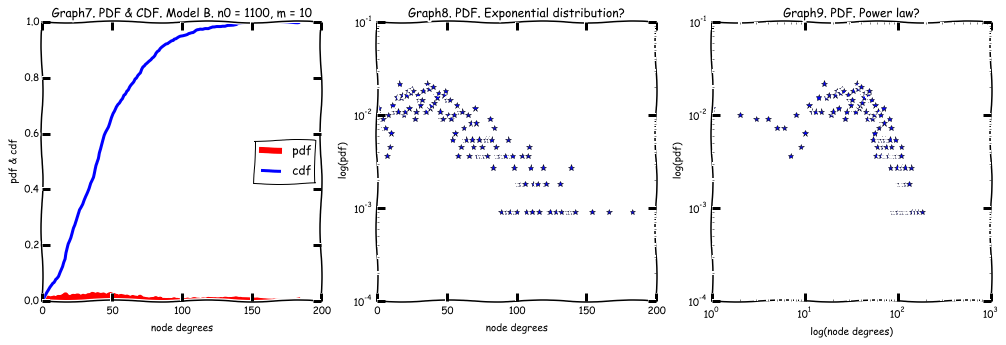

In [262]:
#caclulate pdf and cdf
degree = list(gb.degree().values())

pdf = [sum([degree == k for degree in degree])/gb.number_of_nodes() for k in range(0,max(degree)+1)]
cdf = [sum(pdf[:k]) for k in range(len(pdf)+1)]

#vizualize both cdf and pdf
plt.figure(1, figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(pdf,'-r', label = 'pdf', lw = 6)
plt.plot(cdf,'-', label = 'cdf', lw = 3)
plt.ylabel('pdf & cdf')
plt.xlabel('node degrees')
plt.title('Graph7. PDF & CDF. Model B. n0 = 1100, m = 10')
plt.legend(loc = 7)

plt.subplot(1,3,2)
plt.plot(pdf,'*')
plt.yscale('log')
plt.ylabel('log(pdf)')
plt.xlabel('node degrees')
plt.title('Graph8. PDF. Exponential distribution?')

plt.subplot(1,3,3)
plt.loglog(pdf,'*')
plt.ylabel('log(pdf)')
plt.xlabel('log(node degrees)')
plt.title('Graph9. PDF. Power law?')


<par>Commonly asserted that at early steps when our network is characterized by a lack of links, and each new link connects previously unconnected nodes due to prefferential attachment many hubs are arising, and simulations show that the model develops a degree distribution with a power-law tail, but a turn point exists, roughly $t \approx n^{2}$, when the network starts to converge to a complete graph while a node degree converges to the average degree. Thus the degree distribution should become peaked and similar to Gaussian distribution, but it takes a lot of iterations, which is beyond the limits of my computer :(
<par>Nevertheless according to graphs above (8 - 9) the degree distribution at bigger extent agrees with exponential distribution rather then with power law.
<par> That is why estimate a $\lambda$
<par> $\lambda \approx 0.023$

In [264]:
degree = list(gb.degree().values())
lam = 1/((sum(degree)/len(degree)))
print('Lambda equals to ' + str(lam))

Lambda equals to 0.022933867066966894


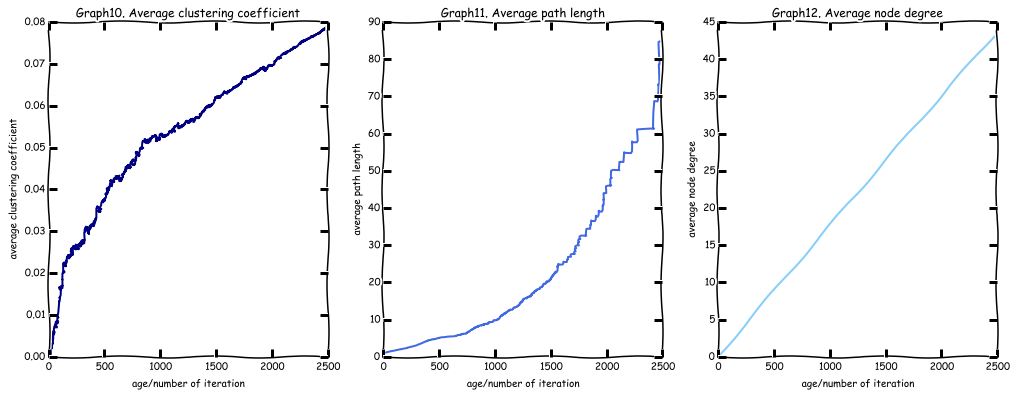

In [265]:
plt.figure(1, figsize=(17,6))

plt.subplot(1,3,1)
plt.plot(aver_clust,'-', color = '#000080')
plt.ylabel('average clustering coefficient')
plt.xlabel('age/number of iteration')
plt.title('Graph10. Average clustering coefficient')

plt.subplot(1,3,2)
plt.plot(aver_path,color = '#4169E1')
plt.ylabel('average path length')
plt.xlabel('age/number of iteration')
plt.title('Graph11. Average path length')

plt.subplot(1,3,3)
plt.plot(aver_deg, color = '#87CEFA')
plt.ylabel('average node degree')
plt.xlabel('age/number of iteration')
plt.title('Graph12. Average node degree')

Similarly to previous case Model B is not enough to provide scale - free model structure.

Analyze what happens if at every step more edges would be added. m = 50.

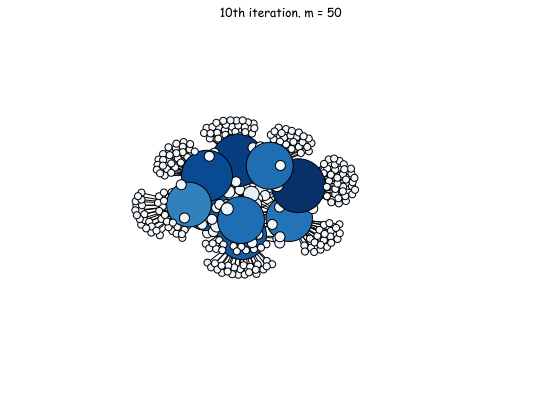

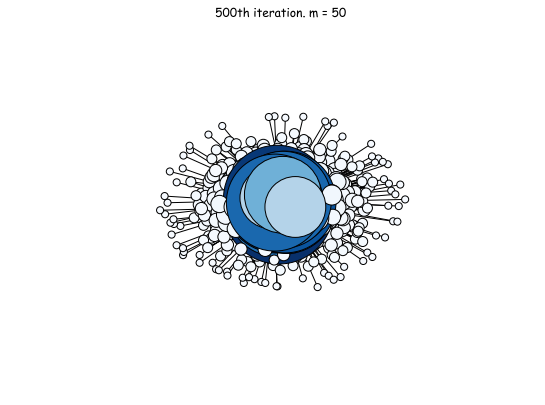

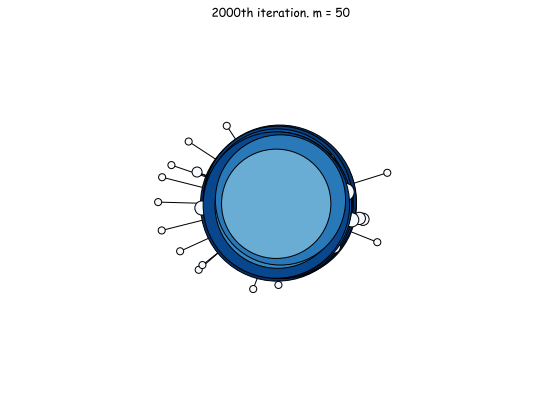

In [268]:
######## 50 #####
#set parameters
n0 = 1100
m = 50

#graph genetor
gb = nx.empty_graph(n0)

i = 1
j = 1

aver_path = []
aver_clust = []
aver_deg = []

while i < 2001:
    c = random.sample(range(n0),1)
    node = c[0]
    nodelist = gb.nodes()
    index = nodelist.index(node) 
    nodelist.remove(node)
    deg = list(gb.degree().values())
    deg = [x + 1 for x in deg]
    deg.pop(index)
    pa = [([x]*y )for (x,y) in zip(nodelist,deg)]
    pa = sum(pa,[])
    addnode = random.sample(pa, m)
    gb.add_edges_from([(node, k) for k in addnode])
    
    aver_clust.append(nx.average_clustering(gb))
    
    deg = gb.degree().values()
    aver_deg.append(sum(deg)/len(deg))
    
    path = [len(c) for c in sorted(nx.connected_components(gb), key=len, reverse=True)]
    averpath = sum(path)/len(path)
    aver_path.append(averpath)
    i += 1
    
    if i in [10, 500, 2000]:
        plt.figure(j,figsize = (7,5))
        nx.draw_spring(gb,
          node_size = [d*50 for d in list(nx.degree(gb).values())],
          node_color=list(nx.degree(gb).values()),
          cmap=plt.cm.Blues,
          )
        plt.title(str(i) + 'th iteration. m = 50')
        j += 1

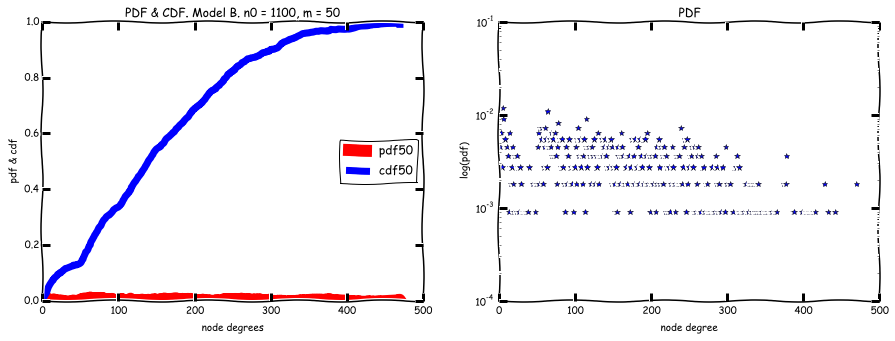

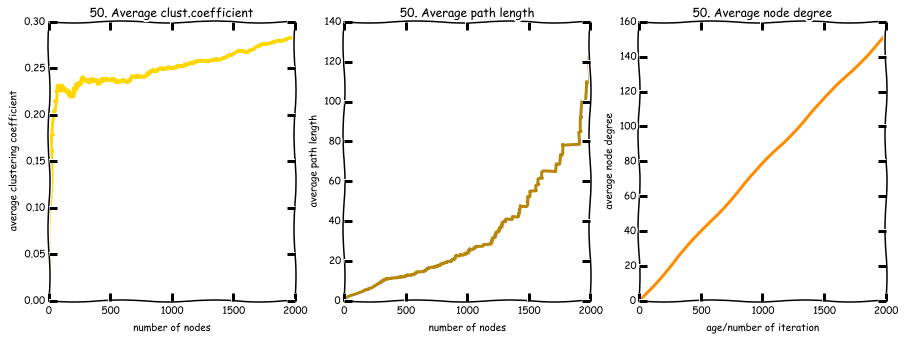

In [269]:
########### 50 ###################
degree = list(gb.degree().values())
pdf200 = [sum([degree == k for degree in degree])/gb.number_of_nodes() for k in range(1,max(degree)+1)]
cdf200 = [sum(pdf200[:k]) for k in range(len(pdf200))]
#vizualize both cdf and pdf and properties

plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(pdf200,'-r', label = 'pdf50',lw = 12)
plt.plot(cdf200,'-', label = 'cdf50',lw = 7)
plt.ylabel('pdf & cdf')
plt.xlabel('node degrees')
plt.title('PDF & CDF. Model B. n0 = 1100, m = 50')
plt.legend(loc = 7)

plt.subplot(1,2,2)
plt.plot(pdf200,'*')
plt.yscale('log')
plt.ylabel('log(pdf)')
plt.xlabel('node degree')
plt.title('PDF')

plt.figure(2, figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(aver_clust,'-', color = '#FFD700', lw = 3)
plt.ylabel('average clustering coefficient')
plt.xlabel('number of nodes')
plt.title('50. Average clust.coefficient')

plt.subplot(1,3,2)
plt.plot(aver_path,color = '#B8860B', lw = 3)
plt.ylabel('average path length')
plt.xlabel('number of nodes')
plt.title('50. Average path length')

plt.subplot(1,3,3)
plt.plot(aver_deg, color = '#FF8C00', lw = 3)
plt.ylabel('average node degree')
plt.xlabel('age/number of iteration')
plt.title('50. Average node degree')

In [270]:
degree = list(gb.degree().values())
lam = 1/((sum(degree)/len(degree)))
print('Lambda equals to ' + str(lam))

Lambda equals to 0.006584303021596514


One enough obvious fact which is appropriate for model B as well as for model A --- bigger the m faster pdf decays to x axis.

# Task 2

In [7]:
#define a new function flip, which returns 1 with desirable probability
def flip(q):
    if random.random() <= q:
        return 1
    else:
        return 0

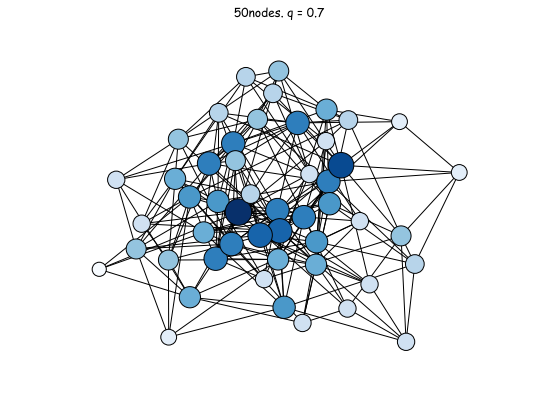

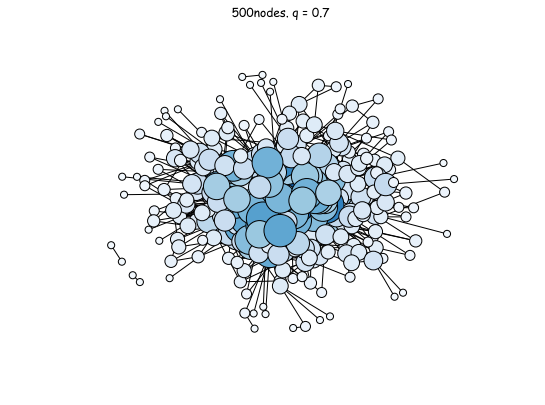

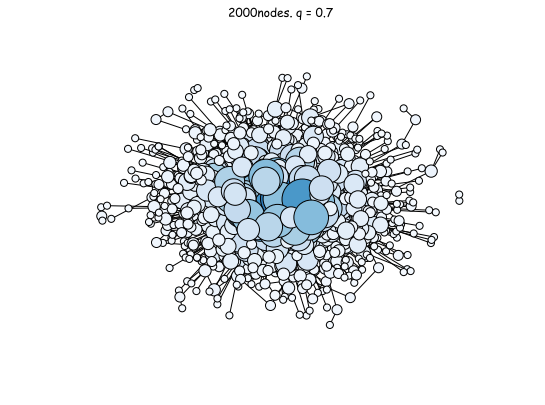

In [8]:
#parameters
n0 = 50
m0 = 210
q = 0.7

### network gen.
g2 = nx.gnm_random_graph(n0,m0)
n = n0
j = 1

aver_path = [nx.average_clustering(g2)]
deg = g2.degree().values()
aver_clust = [sum(deg)/len(deg)]
path = [len(c) for c in sorted(nx.connected_components(g2), key=len, reverse=True)]
aver_deg = [sum(path)/len(path)]

i = 0

while n < 2121:
    if n in [50, 500, 2000]:
        plt.figure(j,figsize = (7,5))
        nx.draw(g2,
          node_size = [d*50 for d in list(nx.degree(g2).values())],
          node_color=list(nx.degree(g2).values()),
          cmap=plt.cm.Blues,
          )
        plt.title(str(n) + 'nodes. q = 0.7')
        j += 1
    g2.add_node(n)
    c = random.sample(range(n),1)
    node = c[0]
    posnodes = [y for (x,y) in g2.edges() if x == node]
    prob = []
    for i in range(len(posnodes)):
        prob.append(flip(q))
    
    nodeold = [(x*y) for (x,y) in zip(posnodes,prob) if (x*y) > 0]
    
    new = len(prob) - sum(x for x in prob)
    z = list(range(n))
    z.remove(node)
    for elem in posnodes:
        z.remove(elem)
    nodenew = random.sample(z,new)
    
    g2.add_edges_from([(n, k) for k in nodeold])
    g2.add_edges_from([(n, k) for k in nodenew])
    
    aver_clust.append(nx.average_clustering(g2))
    
    deg = g2.degree().values()
    aver_deg.append(sum(deg)/len(deg))
    
    path = [len(c) for c in sorted(nx.connected_components(g2), key=len, reverse=True)]
    averpath = sum(path)/len(path)
    aver_path.append(averpath)
    i += 1
    n = g2.number_of_nodes()



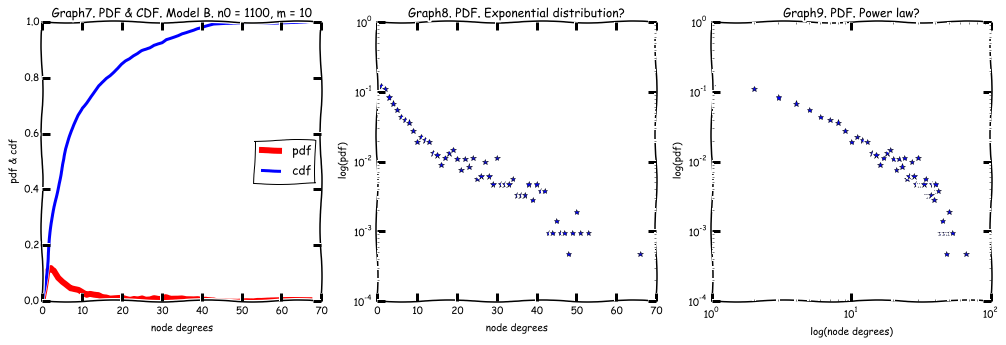

In [288]:
#caclulate pdf and cdf
degree = list(g2.degree().values())

pdf = [sum([degree == k for degree in degree])/g2.number_of_nodes() for k in range(0,max(degree)+1)]
cdf = [sum(pdf[:k]) for k in range(len(pdf)+1)]

#vizualize both cdf and pdf
plt.figure(1, figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(np.insert(pdf,0,0),'-r', label = 'pdf', lw = 6)
plt.plot(cdf,'-', label = 'cdf', lw = 3)
plt.ylabel('pdf & cdf')
plt.xlabel('node degrees')
plt.title('Graph7. PDF & CDF. Model B. n0 = 1100, m = 10')
plt.legend(loc = 7)

plt.subplot(1,3,2)
plt.plot(pdf,'*')
plt.yscale('log')
plt.ylabel('log(pdf)')
plt.xlabel('node degrees')
plt.title('Graph8. PDF. Exponential distribution?')

plt.subplot(1,3,3)
plt.loglog(pdf,'*')
plt.ylabel('log(pdf)')
plt.xlabel('log(node degrees)')
plt.title('Graph9. PDF. Power law?')


<par> According to this model the degree distribution, how it can be observed on graphs above, is more consistent to power law distribution, that is why estimate $\alpha$.
<par> $\alpha \approx 1$

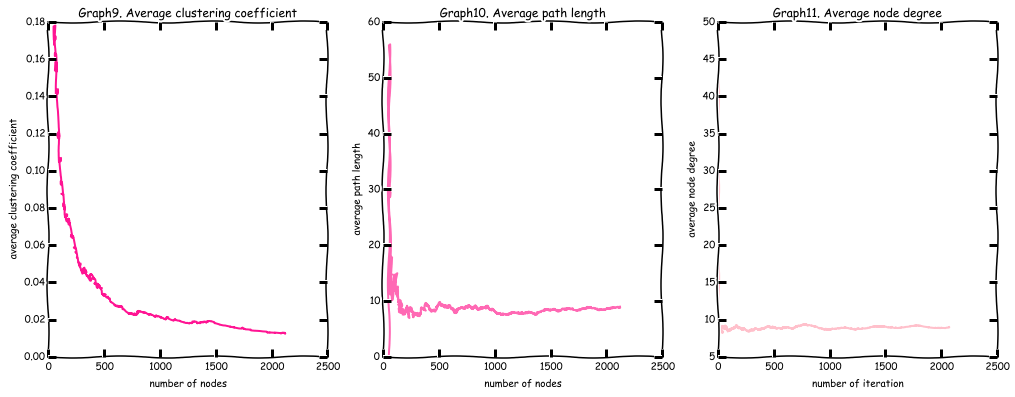

In [289]:
plt.figure(1, figsize=(17,6))

plt.subplot(1,3,1)
plt.plot(range(50,2121),aver_clust[1:], color = '#FF1493')
plt.ylabel('average clustering coefficient')
plt.xlabel('number of nodes')
plt.title('Graph9. Average clustering coefficient')

plt.subplot(1,3,2)
plt.plot(range(50,2122),aver_path,color = '#FF69B4')
plt.ylabel('average path length')
plt.xlabel('number of nodes')
plt.title('Graph10. Average path length')

plt.subplot(1,3,3)
plt.plot(aver_deg, color = '#FFC0CB')
plt.ylabel('average node degree')
plt.xlabel('number of iteration')
plt.title('Graph11. Average node degree')

<par> How it can be exhibited by the graphs above (9 - 11) two properties namely average path length and average node degree are almost sustained to node increasing, while average clustering coefficient does not follow this tendency.

In [300]:
degree = list(g2.degree().values())
xmin = min(degree) + 1
n = len(degree)
alpha = 1 + n/(sum(np.log(i/xmin) for i in degree))
print('Alpha equals to ' + str(alpha))

Alpha equals to 1.0


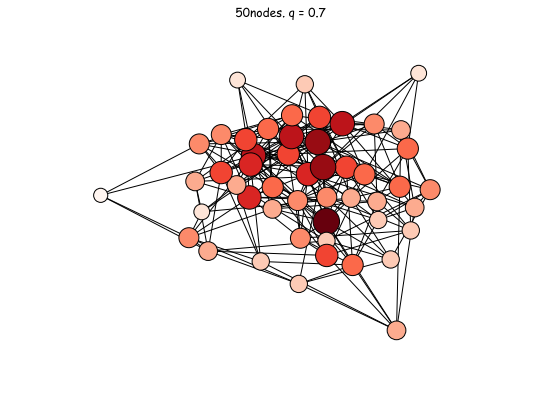

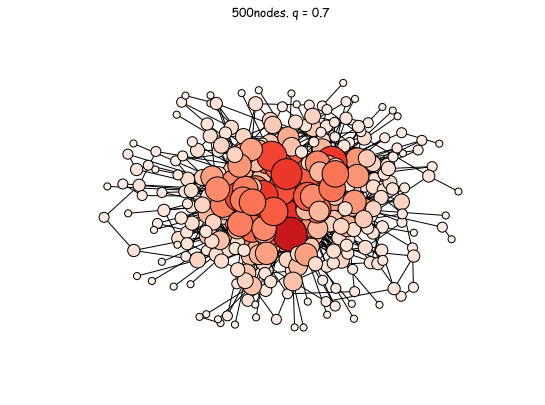

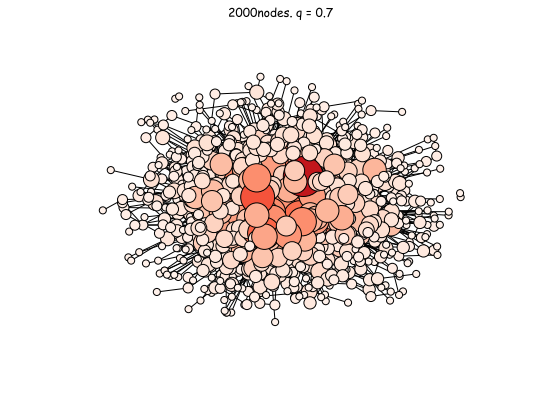

In [26]:
####### q = 0.4 ############
#parameters
n0 = 50
m0 = 210
q = 0.4

### network gen.
g2 = nx.gnm_random_graph(n0,m0)
n = n0
j = 1

aver_path = [nx.average_clustering(g2)]
deg = g2.degree().values()
aver_clust = [sum(deg)/len(deg)]
path = [len(c) for c in sorted(nx.connected_components(g2), key=len, reverse=True)]
aver_deg = [sum(path)/len(path)]

i = 0

while n < 2121:
    if n in [50, 500, 2000]:
        plt.figure(j,figsize = (7,5))
        nx.draw(g2,
          node_size = [d*50 for d in list(nx.degree(g2).values())],
          node_color=list(nx.degree(g2).values()),
          cmap=plt.cm.Reds,
          )
        plt.title(str(n) + 'nodes. q = 0.7')
        j += 1
    g2.add_node(n)
    c = random.sample(range(n),1)
    node = c[0]
    posnodes = [y for (x,y) in g2.edges() if x == node]
    prob = []
    for i in range(len(posnodes)):
        prob.append(flip(q))
    
    nodeold = [(x*y) for (x,y) in zip(posnodes,prob) if (x*y) > 0]
    
    new = len(prob) - sum(x for x in prob)
    z = list(range(n))
    z.remove(node)
    for elem in posnodes:
        z.remove(elem)
    nodenew = random.sample(z,new)
    
    g2.add_edges_from([(n, k) for k in nodeold])
    g2.add_edges_from([(n, k) for k in nodenew])
    
    aver_clust.append(nx.average_clustering(g2))
    
    deg = g2.degree().values()
    aver_deg.append(sum(deg)/len(deg))
    
    path = [len(c) for c in sorted(nx.connected_components(g2), key=len, reverse=True)]
    averpath = sum(path)/len(path)
    aver_path.append(averpath)
    i += 1
    n = g2.number_of_nodes()



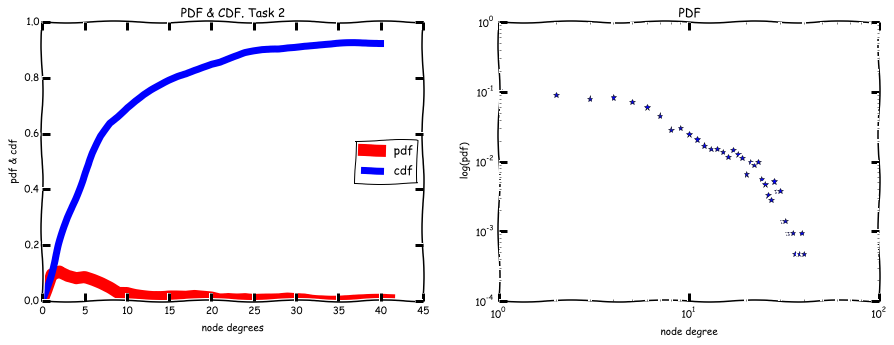

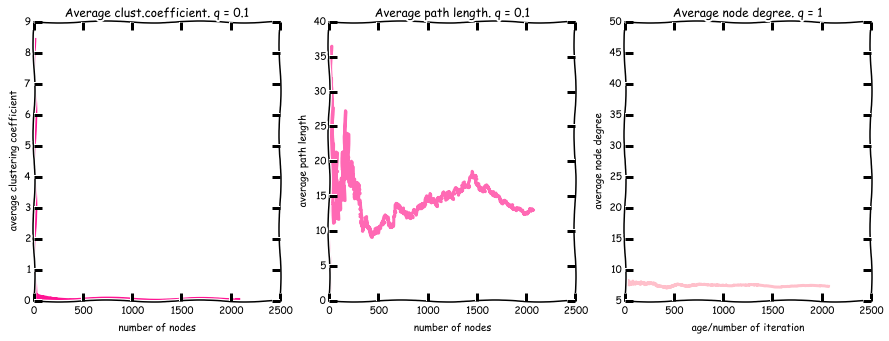

In [27]:
#########
degree = list(g2.degree().values())
pdf = [sum([degree == k for degree in degree])/g2.number_of_nodes() for k in range(1,max(degree)+1)]
cdf = [sum(pdf[:k]) for k in range(len(pdf))]
#vizualize both cdf and pdf and properties

plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.insert(pdf,0,0),'-r', label = 'pdf',lw = 12)
plt.plot(cdf,'-', label = 'cdf',lw = 7)
plt.ylabel('pdf & cdf')
plt.xlabel('node degrees')
plt.title('PDF & CDF. Task 2')
plt.legend(loc = 7)

plt.subplot(1,2,2)
plt.loglog(pdf,'*')
plt.ylabel('log(pdf)')
plt.xlabel('node degree')
plt.title('PDF')

plt.figure(2, figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(aver_clust,'-', color = '#FF1493', lw = 5)
plt.ylabel('average clustering coefficient')
plt.xlabel('number of nodes')
plt.title('Average clust.coefficient. q = 0.1')

plt.subplot(1,3,2)
plt.plot(aver_path,color = '#FF69B4', lw = 3)
plt.ylabel('average path length')
plt.xlabel('number of nodes')
plt.title('Average path length. q = 0.1 ')

plt.subplot(1,3,3)
plt.plot(aver_deg, color = '#FFC0CB', lw = 3)
plt.ylabel('average node degree')
plt.xlabel('age/number of iteration')
plt.title('Average node degree. q = 1')


In [28]:
degree = list(g2.degree().values())
xmin = min(degree) + 1
n = len(degree)
alpha = 1 + n/(sum(np.log(i/xmin) for i in degree))
print('Alpha equals to ' + str(alpha))

Alpha equals to 1.0


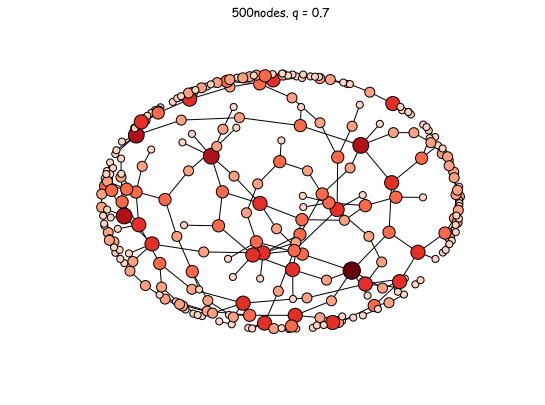

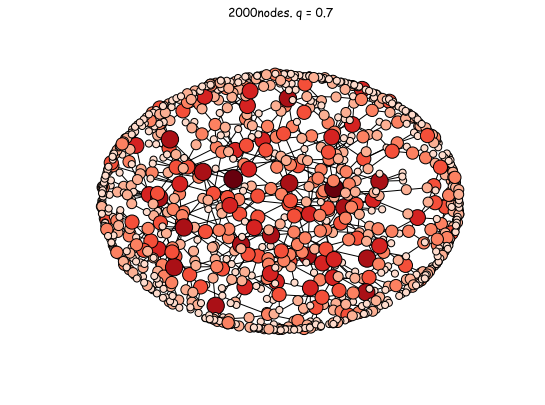

In [29]:
####### q = 0.1 ############
#parameters
n0 = 70
m0 = 40
q = 0.1

### network gen.
g2 = nx.gnm_random_graph(n0,m0)
n = n0
j = 1

aver_path = [nx.average_clustering(g2)]
deg = g2.degree().values()
aver_clust = [sum(deg)/len(deg)]
path = [len(c) for c in sorted(nx.connected_components(g2), key=len, reverse=True)]
aver_deg = [sum(path)/len(path)]

i = 0

while n < 2121:
    if n in [50, 500, 2000]:
        plt.figure(j,figsize = (7,5))
        nx.draw(g2,
          node_size = [d*50 for d in list(nx.degree(g2).values())],
          node_color=list(nx.degree(g2).values()),
          cmap=plt.cm.Reds,
          )
        plt.title(str(n) + 'nodes. q = 0.7')
        j += 1
    g2.add_node(n)
    c = random.sample(range(n),1)
    node = c[0]
    posnodes = [y for (x,y) in g2.edges() if x == node]
    prob = []
    for i in range(len(posnodes)):
        prob.append(flip(q))
    
    nodeold = [(x*y) for (x,y) in zip(posnodes,prob) if (x*y) > 0]
    
    new = len(prob) - sum(x for x in prob)
    z = list(range(n))
    z.remove(node)
    for elem in posnodes:
        z.remove(elem)
    nodenew = random.sample(z,new)
    
    g2.add_edges_from([(n, k) for k in nodeold])
    g2.add_edges_from([(n, k) for k in nodenew])
    
    aver_clust.append(nx.average_clustering(g2))
    
    deg = g2.degree().values()
    aver_deg.append(sum(deg)/len(deg))
    
    path = [len(c) for c in sorted(nx.connected_components(g2), key=len, reverse=True)]
    averpath = sum(path)/len(path)
    aver_path.append(averpath)
    i += 1
    n = g2.number_of_nodes()

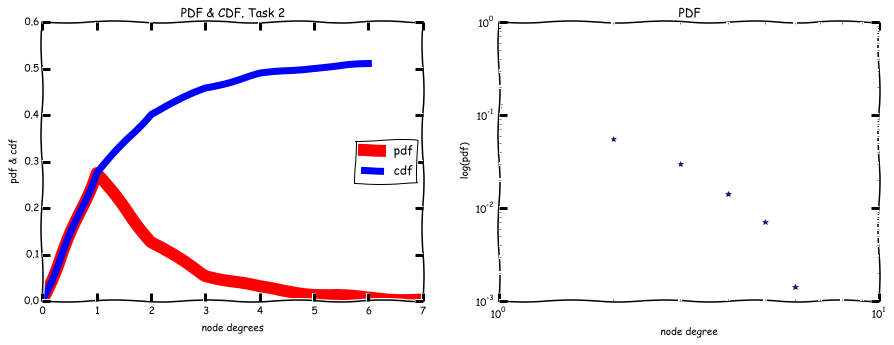

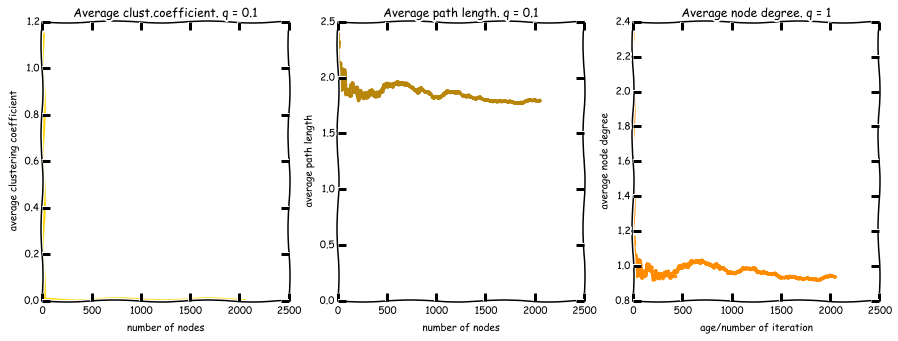

In [30]:
#########
degree = list(g2.degree().values())
pdf = [sum([degree == k for degree in degree])/g2.number_of_nodes() for k in range(1,max(degree)+1)]
cdf = [sum(pdf[:k]) for k in range(len(pdf))]
#vizualize both cdf and pdf and properties

plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.insert(pdf,0,0),'-r', label = 'pdf',lw = 12)
plt.plot(cdf,'-', label = 'cdf',lw = 7)
plt.ylabel('pdf & cdf')
plt.xlabel('node degrees')
plt.title('PDF & CDF. Task 2')
plt.legend(loc = 7)

plt.subplot(1,2,2)
plt.loglog(pdf,'*')
plt.ylabel('log(pdf)')
plt.xlabel('node degree')
plt.title('PDF')

plt.figure(2, figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(aver_clust,'-', color = '#FFD700', lw = 5)
plt.ylabel('average clustering coefficient')
plt.xlabel('number of nodes')
plt.title('Average clust.coefficient. q = 0.1')

plt.subplot(1,3,2)
plt.plot(aver_path,color = '#B8860B', lw = 3)
plt.ylabel('average path length')
plt.xlabel('number of nodes')
plt.title('Average path length. q = 0.1 ')

plt.subplot(1,3,3)
plt.plot(aver_deg, color = '#FF8C00', lw = 3)
plt.ylabel('average node degree')
plt.xlabel('age/number of iteration')
plt.title('Average node degree. q = 1')

In [24]:
degree = list(g2.degree().values())
xmin = min(degree) + 1
n = len(degree)
alpha = 1 + n/(sum(np.log(i/xmin) for i in degree))
print('Alpha equals to ' + str(alpha))

Alpha equals to 1.0


As for distribution properties they are enough sensitive to parameter settings, nevertheless it is possible to reveal some common trends, for instance, average node degree as well as average path length become to be sustainable to node number starting from some moment, which can be considered like scale - free properties.

### The end:)